<img src="img/decisionmaking.png" width="400">

# ELEC-E7851 - ELEC-E7890 - User Research
# Lecture 3 - Inference

**Aurélien Nioche**

Aalto University

<div class="alert alert-block alert-success">
<h2><img src="img/logo/goal.png" width="20" align="left">&nbsp;Learning objectives</h2>
    <br>
    <ul>
        <li> Understand what is a <i>p</i> value and a confidence interval
        <li> Differenciate effect robustness and size effect
        <li> Differenciate parametric and non-parametric inferential tests
        <li> Differenciate what is a type-1 and type-2 error
        <li> Being able to assess the external validy of a study
    </ul>
</div>

## Course Overview

<br>
<span style="font-size:1.2rem; font-weight:bold">

<a href="#Conclusive-Remarks-and-a-Few-Take-Aways">Conclusive Remarks and a Few Take Aways</a>

<a href="#Additional-material">Additional material</a>

# 1. Inferential statistics: what for?
<a href="#Course-Overview">Course Overview</a>

Let's considerate data $D_N$ that follows a normal distribution, that is such that:
$$ D_N\sim \mathcal{N} (\mu ,\sigma )$$
the probability density function of the normal distribution being :
$$ {f(x)= \frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}} $$

In [56]:
# Import the libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import string  # for adding letters in the figures
import scipy.special as sps  # For gamma function

In [31]:
# Define the parameters of my samples
mean_1 = 150.0
mean_2 = 200.0

small_std = 10.0
large_std = 50.0

n = 100

In [32]:
np.random.seed(4)

val1_small_std = np.random.normal(mean_1, scale=large_std, size=n)
val2_small_std = np.random.normal(mean_2, scale=large_std, size=n)

val1_large_std = np.random.normal(mean_1, scale=small_std, size=n)
val2_large_std = np.random.normal(mean_2, scale=small_std, size=n)

print("val1_small_std (3 first values):", val1_small_std[:3])
print("val2_small_std (3 first values):", val2_small_std[:3])
print("val1_large_std (3 first values):", val1_large_std[:3])
print("val2_large_std (3 first values):", val2_large_std[:3])

val1_small_std (3 first values): [152.52808536 174.99756666 100.20455344]
val2_small_std (3 first values): [236.91235556 232.53766155 230.73703148]
val1_large_std (3 first values): [145.27337184 150.96267944 162.29213395]
val2_large_std (3 first values): [211.9451626  195.01279275 199.19260386]


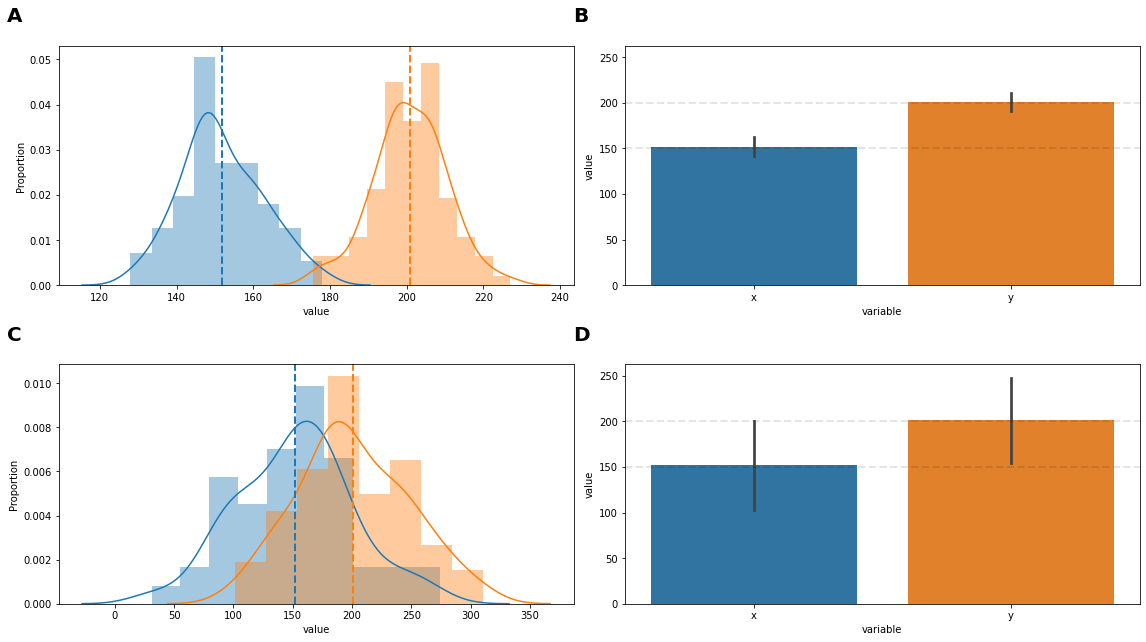

In [33]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))

i = 0
for val1, val2 in ((val1_large_std, val2_large_std), (val1_small_std, val2_small_std)):

    ax = axes[i, 0]
    sns.distplot(val1, ax=ax, color="C0")
    sns.distplot(val2, ax=ax, color="C1")

    ax.axvline(np.mean(val1), label="mean", color='C0', lw=2, ls='--')
    ax.axvline(np.mean(val2), label="mean", color='C1', lw=2, ls='--')

    ax.set_ylabel("Proportion")
    ax.set_xlabel("value")

    ax = axes[i, 1]

    df = pd.DataFrame({
        "x": val1,
        "y": val2
    }).melt()

    sns.barplot(x="variable", y="value", ax=ax, data=df, ci="sd")

    ax.set_ylim(0, max(mean_1, mean_2) + large_std * 1.25)
    ax.axhline(mean_1, ls='--', color='black', alpha=0.1, lw=2)
    ax.axhline(mean_2, ls='--', color='black', alpha=0.1, lw=2)

    i += 1
    
for i, ax in enumerate(axes.flatten()):
    ax.text(-0.1, 1.1, string.ascii_uppercase[i], transform=ax.transAxes, 
            size=20, weight='bold')

plt.tight_layout()
plt.show()

In [34]:
t, p = stats.ttest_ind(val1_large_std, val2_large_std)
print(f"t={t}, p={p}")

t=-34.11619742828222, p=7.512953246606366e-85


# 2. What's a stastical test? What's the p-value?
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-danger">
<h2><img src="img/logo/warning.png" width="20" align="left">&nbsp;Important</h2>
    <br>
    A statistical test have <b>conditions</b> of application relative to the <b>shape of the distributions</b> you wish to compare
    </div>

The t statistic to test whether the means are different can be calculated as follows:

$${\displaystyle t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}{\sqrt {\frac {2}{n}}}}}}$$
where

$${\displaystyle s_{p}={\sqrt {\frac {s_{X_{1}}^{2}+s_{X_{2}}^{2}}{2}}}.}$$
Here $s_p$ is the pooled standard deviation for $n = n_1 = n_2$ and $s_{X_1}^2$ and $s_{X_2}^2$ are the unbiased estimators of the variances of the two samples, s.t.

$${s_X^{2}= {\frac {1}{n-1}}\sum _{i=1}^{n}\left(Y_{i}-{\overline {Y}}\right)^{2}}$$

The denominator of t is the standard error of the difference between two means.

In [42]:
a, b = val1_large_std, val2_large_std

n = len(a)
assert len(a) == len(b)

mean1, mean2 = np.mean(val1_large_std), np.mean(val2_large_std)

v1 = np.var(a, ddof=1)
v2 = np.var(b, ddof=1)

sp = np.sqrt((v1 + v2)/2)
denom = sp * np.sqrt(2 / n)

d = mean1 - mean2
t = d/denom

print("t", t)

t -34.11619742828222


---

Student's t-distribution has the probability density function given by:
$$\frac{\Gamma \left(\frac{\nu+1}{2} \right)} {\sqrt{\nu\pi}\,\Gamma \left(\frac{\nu}{2} \right)} \left(1+\frac{x^2}{\nu} \right)^{-\frac{\nu+1}{2}}$$
where $\nu$  is the number of degrees of freedom $\Gamma (\alpha )$ is the gamma function. For all positive integers, $ \Gamma (\alpha )=(\alpha -1)!$

For significance testing, the degrees of freedom for this test is 2n − 2 where n is the number of participants in each group.

In [68]:
import scipy.stats.distributions as distributions
df = 2*n - 2
prob = distributions.t.sf(np.abs(t), df) * 2
print("p", prob)

p 7.512953246606366e-85


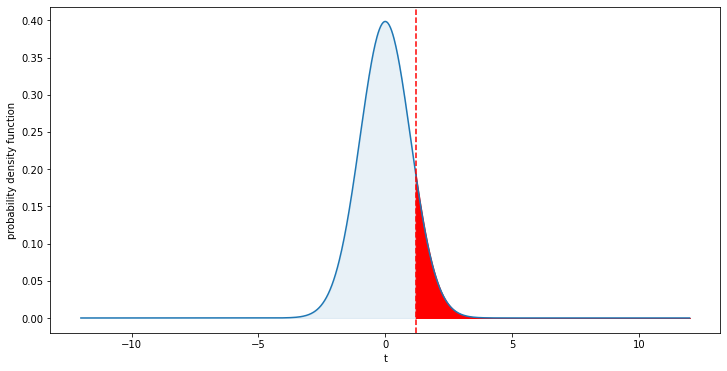

In [89]:
g = sps.gamma

x = np.linspace(-12, 12, 1000)
y = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x**2/df) ** (-(df+1)/2)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y)
ax.set_xlabel("t")
ax.set_ylabel("probability density function")

t_value = 1.2

x = np.linspace(-12, t_value, 1000)
y_f = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x**2/df) ** (-(df+1)/2)
ax.fill_between(x, 0, y_f, color="C0", alpha=0.1)

x = np.linspace(t_value, 12, 1000)
y_f = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x**2/df) ** (-(df+1)/2)
ax.fill_between(x, 0, y_f, color="red")
ax.axvline(t_value, ls='--', color="red")
plt.show()

$$
     \frac{1}{2} + x \Gamma \left( \frac{\nu+1}{2} \right)  \times
     \frac{\,_2F_1 \left ( \frac{1}{2},\frac{\nu+1}{2};\frac{3}{2};
           -\frac{x^2}{\nu} \right)}
     {\sqrt{\pi\nu}\,\Gamma \left(\frac{\nu}{2}\right)}$$
where $_2F_1$ is the hypergeometric function

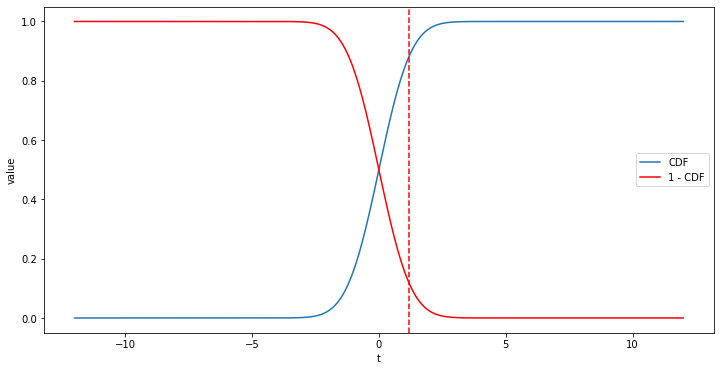

In [93]:
x = np.linspace(-12, 12, 1000)

fig, ax = plt.subplots(figsize=(12, 6))

y1 = distributions.t.cdf(x, df)
ax.plot(x, y1, label="CDF", color="C0")
ax.set_xlabel("t")
ax.set_ylabel("value")

ax.plot(x, 1 - y1, label="1 - CDF", color="red")
ax.set_xlabel("t")

ax.axvline(t_value, ls='--', color="red")

ax.legend()
plt.show()

For further explanation, you can refer to: <a href="https://doi.org/10.1038/nmeth.2698">Krzywinski, M., Altman, N. Significance, P values and t-tests. Nat Methods 10, 1041–1042 (2013).</a>

---

One sided vs two-sided

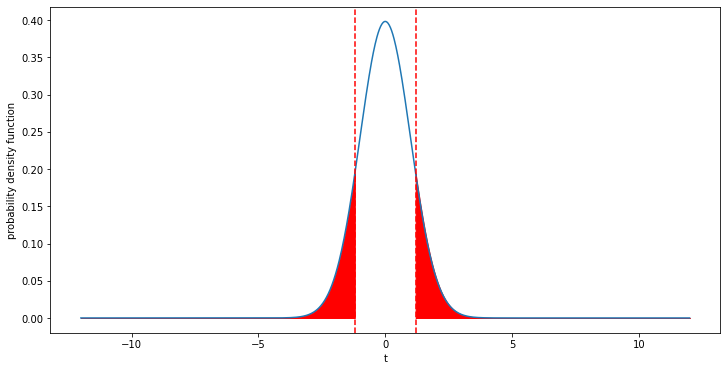

In [100]:
g = sps.gamma

x = np.linspace(-12, 12, 1000)
y = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x**2/df) ** (-(df+1)/2)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y)
ax.set_xlabel("t")
ax.set_ylabel("probability density function")

t_value = 1.2

for t in (t_value, -t_value):
    if t > 0:
        x = np.linspace(t, 12, 1000)
    else:
        x = np.linspace(-12, t, 1000)
    y_f = (g((df+1)/2) / (np.sqrt(df * np.pi)*g(df/2))) * (1+x**2/df) ** (-(df+1)/2)
    ax.fill_between(x, 0, y_f, color="red")
    ax.axvline(t, ls='--', color="red")
plt.show()

**Note: Two sided is more conservative than one sided**

In [ ]:
Effect of sample size

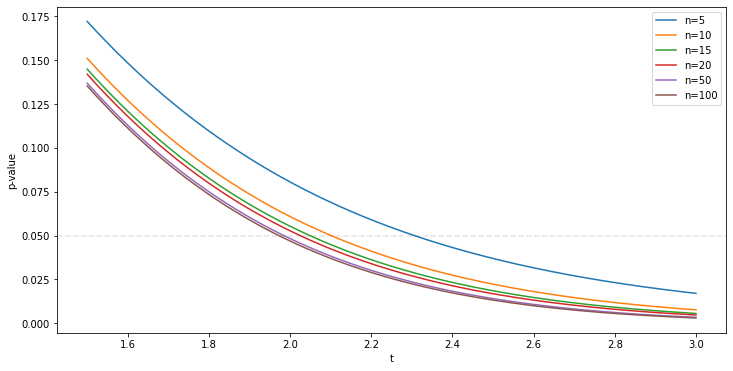

In [114]:
x = np.linspace(1.5, 3, 1000)
ns = [5, 10, 15, 20, 50, 100]

fig, ax = plt.subplots(figsize=(12, 6))

for n in ns:
    df = 2*n - 2
    y = (1 - distributions.t.cdf(x, df)) * 2

    ax.plot(x, y, label=f"n={n}")
    
ax.set_xlabel("t")
ax.set_ylabel("p-value")

ax.axhline(0.05, ls='--', color="black", alpha=0.1)
ax.legend()

plt.show()

# 2. The condition of application of a stastical test

<img src="img/doc_t_test.png" width="600">

Apply a Student t-test only if:
* samples have equal size
* distributions are normally distributed
* variance of each sample is the same

## 2.1 The samples unequal and/or variances are unequal

In [ ]:
np.random.seed(4)

m1, m2 = 100, 150
std1, std2 = 50, 10

n = 100

x1 = np.random.normal(m1, scale=std1, size=n)
x2 = np.random.normal(m2, scale=std2, size=n)

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))

i = 0
for val1, val2 in ((val1_large_std, val2_large_std), (val1_small_std, val2_small_std)):

    ax = axes[i, 0]
    sns.distplot(val1, ax=ax, color="C0")
    sns.distplot(val2, ax=ax, color="C1")

    ax.axvline(np.mean(val1), label="mean", color='C0', lw=2, ls='--')
    ax.axvline(np.mean(val2), label="mean", color='C1', lw=2, ls='--')

    ax.set_ylabel("Proportion")
    ax.set_xlabel("value")

    ax = axes[i, 1]

    df = pd.DataFrame({
        "x": val1,
        "y": val2
    }).melt()

    sns.barplot(x="variable", y="value", ax=ax, data=df, ci="sd")

    ax.set_ylim(0, max(mean_1, mean_2) + large_std * 1.25)
    ax.axhline(mean_1, ls='--', color='black', alpha=0.1, lw=2)
    ax.axhline(mean_2, ls='--', color='black', alpha=0.1, lw=2)

    i += 1
    
for i, ax in enumerate(axes.flatten()):
    ax.text(-0.1, 1.1, string.ascii_uppercase[i], transform=ax.transAxes, 
            size=20, weight='bold')

plt.tight_layout()
plt.show()

Welch's t-test

$${\displaystyle t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{\bar {\Delta }}}}}$$
where

$${\displaystyle s_{\bar {\Delta }}={\sqrt {{\frac {s_{1}^{2}}{n_{1}}}+{\frac {s_{2}^{2}}{n_{2}}}}}.}$$

## Distribution is not normal

Let's now consider the data follows a Gamma distribution, that is such that:
$$ D_G \sim \mathrm{Gamma} (\alpha ,\beta )$$
the probability density function of the Gamma distribution being :
$${\begin{aligned}f(x;\alpha ,\beta )&={\frac {\beta ^{\alpha }x^{\alpha -1}e^{-\beta x}}{\Gamma (\alpha )}}\quad {\text{ for }}x>0\quad \alpha ,\beta >0,\\[6pt]\end{aligned}}$$
where $\Gamma (\alpha )$ is the gamma function. For all positive integers, $ \Gamma (\alpha )=(\alpha -1)!$

In [124]:
# From the doc: Samples are drawn from a Gamma distribution with specified parameters, 
# shape (sometimes designated “k”) and scale (sometimes designated “theta”), 
# where both parameters are > 0.
# knowing that theta = 1/beta
np.random.seed(124)
k1, t1 = 1, 10
k2, t2 = 1.5, 14
x1 = np.random.gamma(k1, scale=t1, size=30)
x2 = np.random.gamma(k2, scale=t2, size=30)


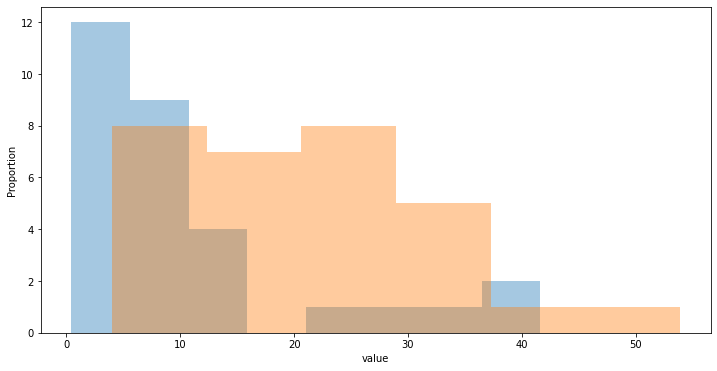

In [126]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.distplot(x1, kde=False, norm_hist=False, ax=ax)
sns.distplot(x2, kde=False, norm_hist=False, ax=ax)

ax.set_ylabel("Proportion")
ax.set_xlabel("value")

plt.show()

Mann–Whitney U test 

Assign numeric ranks to all the observations (put the observations from both groups to one set), beginning with 1 for the smallest value. Where there are groups of tied values, assign a rank equal to the midpoint of unadjusted rankings. E.g., the ranks of (3, 5, 5, 5, 5, 8) are (1, 3.5, 3.5, 3.5, 3.5, 6) (the unadjusted rank would be (1, 2, 3, 4, 5, 6)).
Now, add up the ranks for the observations which came from sample 1. The sum of ranks in sample 2 is now determinate, since the sum of all the ranks equals N(N + 1)/2 where N is the total number of observations.
U is then given by:[4]
{\displaystyle U_{1}=R_{1}-{n_{1}(n_{1}+1) \over 2}\,\!}{\displaystyle U_{1}=R_{1}-{n_{1}(n_{1}+1) \over 2}\,\!}
where n1 is the sample size for sample 1, and R1 is the sum of the ranks in sample 1.
Note that it doesn't matter which of the two samples is considered sample 1. An equally valid formula for U is
{\displaystyle U_{2}=R_{2}-{n_{2}(n_{2}+1) \over 2}\,\!}{\displaystyle U_{2}=R_{2}-{n_{2}(n_{2}+1) \over 2}\,\!}
The smaller value of U1 and U2 is the one used when consulting significance tables. The sum of the two values is given by
{\displaystyle U_{1}+U_{2}=R_{1}-{n_{1}(n_{1}+1) \over 2}+R_{2}-{n_{2}(n_{2}+1) \over 2}.\,\!}U_{1}+U_{2}=R_{1}-{n_{1}(n_{1}+1) \over 2}+R_{2}-{n_{2}(n_{2}+1) \over 2}.\,\!
Knowing that R1 + R2 = N(N + 1)/2 and N = n1 + n2, and doing some algebra, we find that the sum is
U1 + U2 = n1n2.

# Correlations

In [122]:
df = pd.read_csv(os.path.join("data", "rr.csv"))
print(df.head())

     Country  Year        Debt    Growth
0  Australia  1946  190.419080 -3.557951
1  Australia  1947  177.321371  2.459475
2  Australia  1948  148.929811  6.437534
3  Australia  1949  125.828699  6.611994
4  Australia  1950  109.809398  6.920201


<AxesSubplot:xlabel='Debt', ylabel='Growth'>

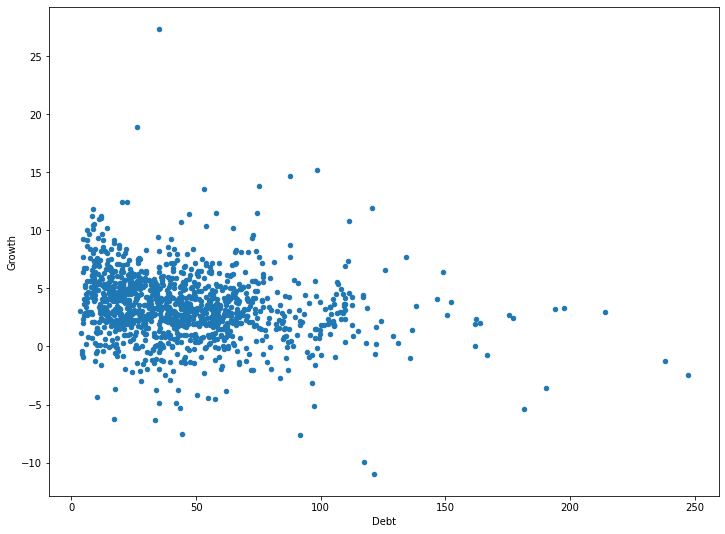

In [127]:
df.plot.scatter(x="Debt", y="Growth", figsize=(12, 9))

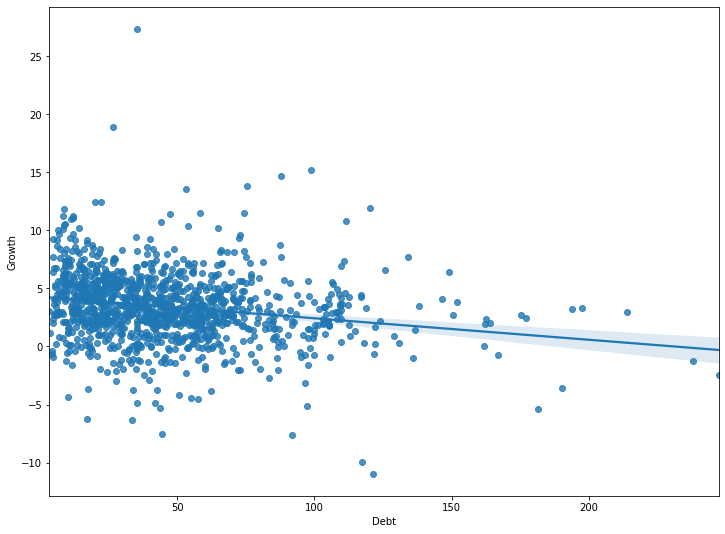

r = -0.20
p < 0.001


In [128]:
import scipy.stats as stats

fig, ax =plt.subplots(figsize=(12, 9))
sns.regplot(x="Debt", y="Growth", data=df, ax=ax)
plt.show()

r, p = stats.pearsonr(df["Debt"], df["Growth"])
print(f"r = {r:.2f}")
string_p = f"p = {p:.3f}" if p >= 0.001 else "p < 0.001"
print(string_p)

Data from <a href="https://pubs.aeaweb.org/doi/pdf/10.1257/aer.100.2.573">Reinhart, C. M., & Rogoff, K. S. (2010). Growth in a Time of Debt. American economic review, 100(2), 573-78.</a>

## Conclusive Remarks and a Few Takeaways
<a href="#Course-Overview">Course Overview</a>

<div class="alert alert-block alert-success">
<h2><img src="img/logo/goal.png" width="20" align="left">&nbsp;Learning objectives</h2>
    <br>Learn by a series of examples the elementary rules of experimentation, and the main threats of validity
</div>


## Additional material
<a href="#Course-Overview">Course Overview</a>

(empty, for now!)
